![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrando funções menos regulares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def midpoint(f, a, b, n=1000):
    if a == b:
        return 0
    h = (b-a)/n
    x = np.linspace(a + h/2, b - h/2, n, endpoint=True)
    return h*sum(f(x))
    
    

def simpson(f, a, b, n=1000):
    
    def trap(f, a, b, n=1000):
        if a == b:
            return 0
        pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
        integral = 0
        for i in range(1, len(pts)):
            integral += f(pts[i])*h
        integral += ((f(a)+f(b))*h)/2
        return integral

    ponto_medio = midpoint(f,a,b,n)
    trapezio = trap(f,a,b,n)
    return 2/3*(ponto_medio + 0.5*trapezio)

In [3]:
def f(x):
    return np.abs(np.sin(x))

## Questão 1: Primitiva

Dê uma primitiva analítica de $f$.

Dica: use a função `np.divmod` (versão vetorizada da `divmod` do python).

In [4]:
def F(x):
    """Primitiva de |sin(x)|, exata até a precisão do computador."""
    
    divmod = np.divmod(x,np.pi)
    
    return ((2 * divmod[0]) - np.cos(divmod[1]) + 1)

In [5]:
assert np.isclose(F(10+0.1), F(10) + 0.1 * f(10), atol=1e-2)

In [6]:
assert np.isclose(F(2+0.01), F(2) + 0.01 * f(2), atol=1e-4)

Explique as tolerâncias dos testes acima.

Sabemos que o erro do método do retângulo está na casa de h².

E é possível perceber que a diferença entre os valores do "isclose" é que no segundo argumento estamos adicionando um retângulo a área calculada da integral, e isso pode ser equivalente a calcular a área pelo método do retângulo. Por isso, a tolerância é igual ao erro do método do retângulo, h².

In [7]:
ts = np.linspace(0,10, num=200)
Fts = F(ts)
assert np.all(Fts[1:] > Fts[:-1])

## Questão 2: Erros

Faça um gráfico dos erros de integração de $f$
pelos métodos do ponto médio e Simpson, no intervalo $[0,3]$

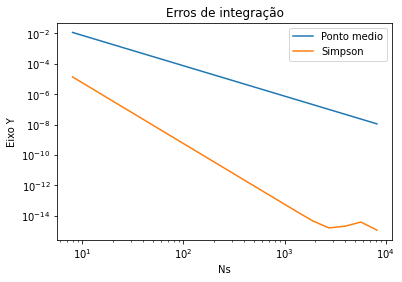

In [38]:
a, b = 0, 3
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)

    
ax = plt.gca()
ax.set(xlabel='Ns', ylabel='Eixo Y',
       title='Erros de integração')

y_simpson = []
y_medio = []
for n in ns:
     y_medio.append(midpoint(f, a, b,n))
ax.loglog(ns,abs(y_medio - exact), label = "Ponto medio")

for n in ns:
    y_simpson.append(simpson(f, a, b,n))
    
ax.loglog(ns,abs(y_simpson - exact), label = "Simpson")

ax.legend()

In [18]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [19]:
ax = None

O que você observa neste gráfico?

Botando o gráfico em escala logarítimica, é possível perceber que os erros diminuem de forma constante, sendo o erro de Simpson sempre menor que o erro do Ponto Medio.

Agora, repita o gráfico para o intervalo $[0,6]$:

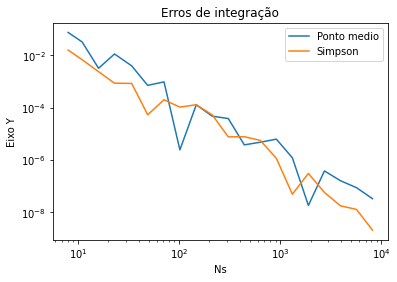

In [39]:
a, b = 0, 6
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)

    
ax = plt.gca()
ax.set(xlabel='Ns', ylabel='Eixo Y',
       title='Erros de integração')

y_simpson = []
y_medio = []
for n in ns:
    y_simpson.append(simpson(f, a, b,n))
    y_medio.append(midpoint(f, a, b,n))
    


     
ax.loglog(ns,abs(y_medio - exact), label = "Ponto medio")
ax.loglog(ns,abs(y_simpson - exact), label = "Simpson")
ax.legend()

In [48]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [21]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

In [50]:
ax = None

Como esse gráfico é diferente do outro?

Pois estarmos passando por uma descontinuidade em $\pi$, o gráfico não fica mais linear como o anterior, ele fica completamente confuso, já que a função não será derivável em $\pi$.


## Questão 3: Encontrando o intervalo contendo $\pi$

Como $|\sin(x)|$ não é derivável em $\pi$, vamos ver quanto erro tem no sub-intervalo que "atravessa" $\pi$.

Escreva a função `I_x(a, b, x, n)` que retorna o intervalo contendo $x$ ao dividir $[a,b]$ em $n$ partes.
Você pode assumir que x nunca vai ser uma das extremidades $a_k$.

In [68]:
def I_x(a, b, x, n):
    """The interval  [xi, xi+h]  containing  x, when  [a,b]  is divided in  n  equal parts.
    Returns  None  if  x  is outside  [a,b]"""
    if (x-a)*(x-b) > 0:
        return
    intervalo = np.linspace(a,b,n+1)
    for i,n in enumerate(intervalo/x):
        if n >=1:
            return intervalo[i-1],intervalo[i]
    

In [69]:
l, r = I_x(0, 6, np.pi, 10)
assert np.isclose(l, 3)
assert np.isclose(r, 3.6)

In [70]:
l, r = I_x(0, 60, np.pi, 10)
assert l <= np.pi <= r

In [71]:
l, r = I_x(0, 1, 0.4, 36)
assert l < 0.4 < r

Agora, faça o gráfico do erro que os métodos do ponto médio e de Simpson
vão dar quando integrarem o intervalo contendo a "descontinuidade" $\pi$,
em função de $n$.

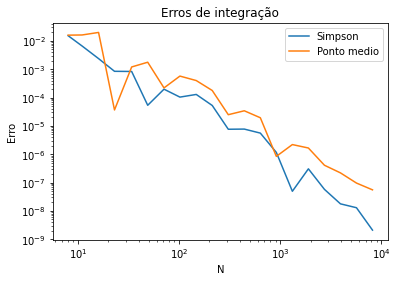

In [75]:
a, b = 0, 6

exact = []
ex = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)

    
ax = plt.gca()
ax.set(xlabel='N', ylabel='Erro',
       title='Erros de integração')


y_simpson = []
y_medio = []
for n in ns: 
    l, r = I_x(a, b, np.pi, n)
    exact.append(F(r) - F(l))
    y_simpson.append(simpson(f, l, r,1))
    y_medio.append(midpoint(f, l, r,1))

ax.loglog(ns,abs(np.array(y_simpson) - exact), label = "Simpson")
     
ax.loglog(ns,abs(np.array(y_medio) - exact), label = "Ponto medio")
ax.legend()

In [77]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [78]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

In [79]:
ax = None

## Questão 4: Um intervalo contra todos

Vamos ver quanto do erro de cada método é causado pelo erro em apenas um intervalo.

Faça um gráfico para comparar esses erros:
- à esquerda, os erros para o ponto médio
- à direita, os erros para o método de Simpson

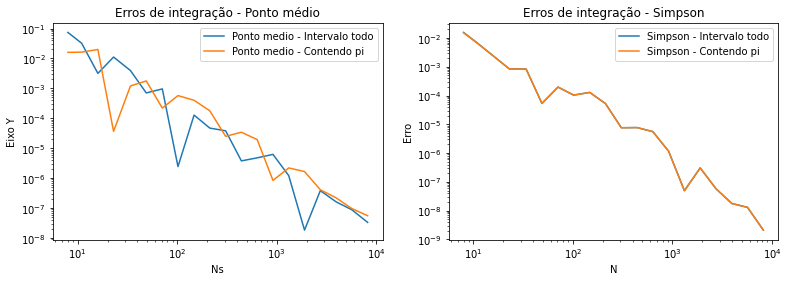

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
a, b = 0, 6



exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)

    

ax1.set(xlabel='Ns', ylabel='Eixo Y',
       title='Erros de integração - Ponto médio')

y_simpson = []
y_medio = []
for n in ns:
    y_simpson.append(simpson(f, a, b,n))
    y_medio.append(midpoint(f, a, b,n))
    


     
ax1.loglog(ns,abs(y_medio - exact), label = "Ponto medio - Intervalo todo")
ax2.loglog(ns,abs(y_simpson - exact), label = "Simpson - Intervalo todo")




exact = []
ns = np.logspace(3,13, num=20, dtype=int, base=2)

    

ax2.set(xlabel='N', ylabel='Erro',
       title='Erros de integração - Simpson')


y_simpson = []
y_medio = []
for n in ns: 
    l, r = I_x(a, b, np.pi, n)
    exact.append(F(r) - F(l))
    y_simpson.append(simpson(f, l, r,1))
    y_medio.append(midpoint(f, l, r,1))

ax2.loglog(ns,abs(np.array(y_simpson) - exact), label = "Simpson - Contendo pi")
     
ax1.loglog(ns,abs(np.array(y_medio) - exact), label = "Ponto medio - Contendo pi")

ax1.legend()
ax2.legend()

In [91]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2

In [92]:
assert len(ax2.lines) == 2
assert len(ax2.legend().texts) == 2

In [93]:
for l in ax1.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7
for l in ax2.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

In [94]:
ax = None

O que você observa quanto aos erros dos métodos?

É possível perceber como no método de simpson, o erro no intervalo pi, acompanha o erro geral, sendo assim o maior fator que contribui para o erro geral. Enquanto no método do ponto médio, essa correlação não está clara. 

## Questão 5: Integração com ajuda humana

Mude a integral de $[0,6]$ por duas integrais, uma em $[0,\pi]$ e outra em $[\pi,6]$.
Faça dois gráficos comparando os erros dos 4 métodos:
- Um para o método do ponto médio, o outro para o método de Simpson
- Em cada um, o erro cometido por uma única integral e o erro cometido pela integral feita em 2 partes

Use o mesmo número $n$ **total** de sub-intervalos, para não "roubar" em favor do que quebra a integral em 2  :-)

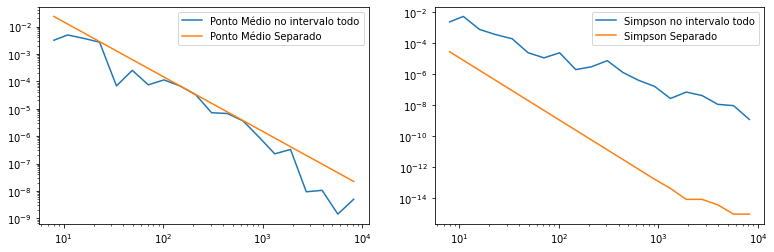

In [104]:
a, c, b = 0, np.pi, 6
exact = F(b) - F(a)
ex1 = F(c) - F(a)
ex2 = F(b) - F(c)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
ns = np.logspace(3,13, num=20, dtype=int, base=2)
# err_simpsons = [abs(exact - simpson(f, a, b, n)) for n in ns]
# err_medios = [abs(exact - midpoint(f, a, b, n)) for n in ns]

# err_simpsons_sep = [abs(exact - (simpson(f, a, c, int(np.ceil(n/2))) + simpson(f, c, b, int(np.floor(n/2))) )) for n in ns]
# err_medios_sep = [abs(exact - (midpoint(f, a, c, int(np.ceil(n/2))) + midpoint(f, c, b, int(np.floor(n/2))))) for n in ns]

err_simpsons = [abs(exact - simpson(f, a, b,  2*n)) for n in ns]
err_medios = [abs(exact - midpoint(f, a, b, 2*n)) for n in ns]

err_simpsons_sep = [abs(exact - (simpson(f, a, c,n) + simpson(f, c, b, n ))) for n in ns]
err_medios_sep = [abs(exact - (midpoint(f, a, c, n) + midpoint(f, c, b, n))) for n in ns]

ax1.loglog(ns, err_medios, label="Ponto Médio no intervalo todo")
ax1.loglog(ns, err_medios_sep, label="Ponto Médio Separado")
ax1.legend()

ax2.loglog(ns, err_simpsons, label="Simpson no intervalo todo")
ax2.loglog(ns, err_simpsons_sep, label="Simpson Separado")
ax2.legend()


ax = plt.gca()

In [ ]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2
assert ax1.get_title != ""

In [ ]:
assert len(ax2.lines) == 2
assert len(ax2.legend().texts) == 2
assert ax2.get_title != ""

In [ ]:
ax = None

O que você observa?
O que você conclui?

É possível perceber que quando separamos o gráfico, e não passamos por pi, o gráfico de erro decai de forma linear. 

Também é possivel perceber como o método de separar funcionou muito bem para o método de Simpson, mas não nos ajudou para o método do ponto médio, onde em geral, o erro separado é maior do que o erro de todo intervalo.

Isto pode ocorrer, pelo sinal dos erros, que acabam se anulando em algumas somas, diminuindo assim o erro calculado para o erro de "todo intervalo".